In [ ]:
# Klasterizavimas

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from Skriptai.manofunkcijos import *

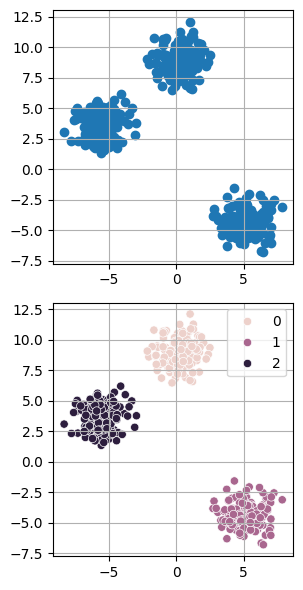

In [5]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 500,n_features =2,centers = 3,random_state = 23)
fig, (axis, ax) = plt.subplots(2,gridspec_kw={'height_ratios':[1,1]},figsize=[3,6])
axis.grid(True)
axis.scatter(X[:,0], X[:,1])
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y,ax=ax)
ax.grid(True)
fig.tight_layout()
plt.show()

In [7]:
from sklearn.cluster import KMeans

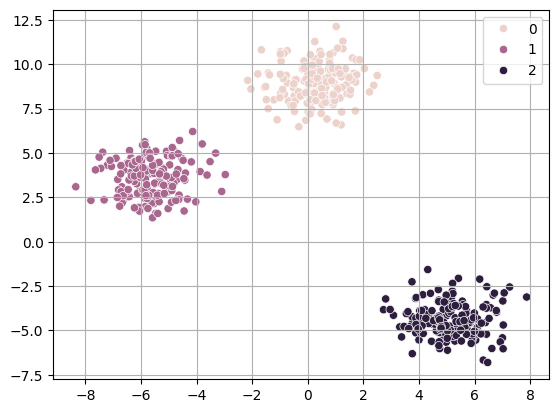

In [8]:
kmeans = KMeans(n_clusters=3)

predicted_labels = kmeans.fit_predict(X)

ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=predicted_labels)

ax.grid(True)

plt.show()

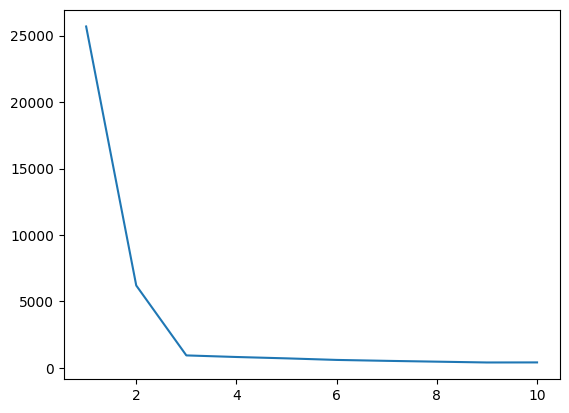

In [11]:
# SUM OF SQAURED ERROR
sse =[]
for k in range(1,11):
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

ax =sns.lineplot(x=[*range(1,11)], y=sse)
plt.show()

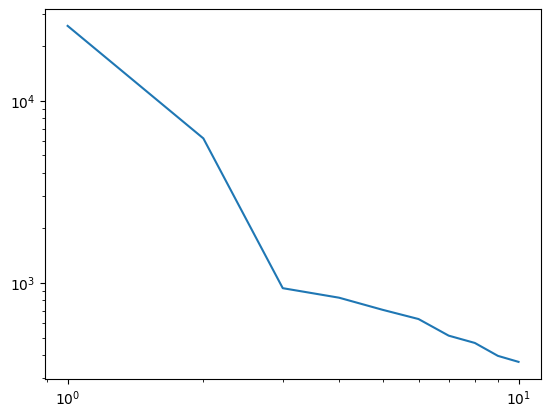

In [12]:
sse =[]
for k in range(1,11):
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

ax =sns.lineplot(x=[*range(1,11)], y=sse)
ax.loglog()
plt.show()

In [14]:
sse

[25690.15430669649,
 6195.761506779751,
 932.8452044497944,
 826.9889567894888,
 709.2040479932673,
 631.6044161314654,
 511.90544103460786,
 466.76612071151845,
 396.4697506234747,
 367.45642644077105]

In [19]:
#  Aruodas skelbimai
# Į kiek klasterių galima suskirstyti Vilniuje esančius sklebimus?
# X - features yra skelbimo koordinatės
# Ar galite suskaičiuoti kiekviename klasteryje esančią vidutinę būsto kainą?
# ?Atvaizduokite duoenis su mapbox()

In [ ]:
aruodas = query_to_dataframe('C:/Users/manta/OneDrive/Dokumentai/Python projektai/web_scrap.db', 'SELECT * FROM aruodas')
aruodas_df = aruodas[aruodas['Tipas'] == 'Butai pardavimui']
aruodas_df['Miestas_n'] = aruodas_df['Miestas'].apply(lambda x: x.split(',')[0])
aruodas_df['X'] = aruodas_df['Coord'].apply(lambda x: float(x.replace('(','').replace(')','').split(',')[0]) if x!='None' else np.nan)
aruodas_df['Y'] = aruodas_df['Coord'].apply(lambda x: float(x.replace('(','').replace(')','').split(',')[1]) if x!='None' else np.nan)
aruodas_df['Kaina_n'] = aruodas_df['Kaina'].apply(lambda x: float(x) if x != None else x)
aruodas_df['Plotas_n'] = aruodas_df['Plotas'].apply(lambda x: x.replace(',','.').split()[0] if x!=None else x)
aruodas_df_vilnius = aruodas_df[aruodas_df['Miestas_n'] == 'Vilnius']
df_check = aruodas_df_vilnius[['X','Y','Kaina_n']].dropna()

In [25]:
aruodas_df_vilnius

,id,Miestas,Kaina,Adresas,Namo numeris,Buto numeris,Plotas,Kambarių sk.,Aukštas,Aukštų sk.,...,Papildoma įranga,Apsauga,Unikalus daikto numeris (RC numeris),Objektas,Kaina mėn.,Bendros erdvės pastate,Coord,Miestas_n,X,Y
0,1,"Vilnius, ŽirmūnaiRiterių g.",165000,"Vilnius, Žirmūnai, Riterių g., 2 kambarių butas",10,127,"40,52 m²",2,5,8,...,None,None,None,None,None,None,"(54.71684325, 25.291961476410883)",Vilnius,54.716843,25.291961
2,3,"Vilnius, PašilaičiaiPerkūnkiemio g.",163000,"Vilnius, Pašilaičiai, Perkūnkiemio g., 3 kamba...",53,None,67 m²,3,8,12,...,Skalbimo mašina\nSu baldais\nŠaldytuvas\nVirtu...,Šarvuotos durys\nKodinė laiptinės spyna,None,None,None,None,"(54.737668150000005, 25.213011185027476)",Vilnius,54.737668,25.213011
8,9,"Vilnius, RasosStepono Batoro g.",231900,"Vilnius, Rasos, Stepono Batoro g., 3 kambarių ...",34,None,"63,09 m²",3,2,3,...,Šildomos grindys,Šarvuotos durys\nSignalizacija\nKodinė laiptin...,None,None,None,None,"(54.68622805, 25.323290287093897)",Vilnius,54.686228,25.323290
9,10,"Vilnius, KaroliniškėsLaisvės pr.",105000,"Vilnius, Karoliniškės, Laisvės pr., 3 kambarių...",44,82,"60,8 m²",3,3,5,...,None,Kodinė laiptinės spyna,None,None,None,None,"(54.697577249999995, 25.21919461611268)",Vilnius,54.697577,25.219195
10,11,"Vilnius, FabijoniškėsFabijoniškių g.",163900,"Vilnius, Fabijoniškės, Fabijoniškių g., 3 kamb...",91,None,72 m²,3,3,9,...,None,None,None,None,None,None,"(54.7279962, 25.246564492907574)",Vilnius,54.727996,25.246564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12797,12798,"Vilnius, RasosLiepkalnio g.",125000,"Vilnius, Rasos, Liepkalnio g., 3 kambarių butas",None,None,85 m²,3,1,1,...,Su baldais\nViryklė,Šarvuotos durys,None,None,None,None,"(54.6534644, 25.3027386)",Vilnius,54.653464,25.302739
12799,12800,"Vilnius, ŽvėrynasLūšių g.",99000,"Vilnius, Žvėrynas, Lūšių g., 1 kambario butas",23,None,"29,78 m²",1,1,4,...,None,None,None,None,None,None,"(54.7007602, 25.2495)",Vilnius,54.700760,25.249500
12805,12806,"Vilnius, ŠnipiškėsKalvarijų g.",159999,"Vilnius, Šnipiškės, Kalvarijų g., 2 kambarių b...",None,None,"54,26 m²",2,1,3,...,Skalbimo mašina\nSu baldais\nVirtuvės komplekt...,Šarvuotos durys\nKodinė laiptinės spyna,None,None,None,None,"(54.6928305, 25.2806132)",Vilnius,54.692830,25.280613
12806,12807,"Vilnius, AntakalnisVolungės g.",85000,"Vilnius, Antakalnis, Volungės g., 1 kambario b...",None,None,30 m²,1,2,5,...,Viryklė\nVonia,Šarvuotos durys\nKodinė laiptinės spyna,None,None,None,None,"(54.7028058, 25.318312)",Vilnius,54.702806,25.318312


In [36]:
df_check

,X,Y,Kaina_n
0,54.716843,25.291961,165000.0
2,54.737668,25.213011,163000.0
8,54.686228,25.323290,231900.0
9,54.697577,25.219195,105000.0
10,54.727996,25.246564,163900.0
...,...,...,...
12797,54.653464,25.302739,125000.0
12799,54.700760,25.249500,99000.0
12805,54.692830,25.280613,159999.0
12806,54.702806,25.318312,85000.0


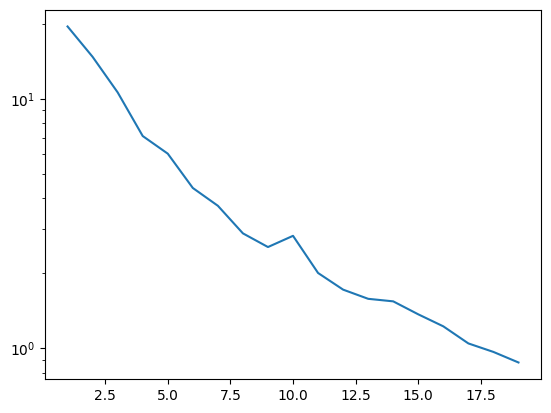

In [62]:
# SUM OF SQAURED ERROR
sse =[]
for k in range(1,20):
    km = KMeans(n_clusters=k)
    km.fit(df_check[['X','Y']])
    sse.append(km.inertia_)

ax =sns.lineplot(x=[*range(1,20)], y=sse)
ax.semilogy()
plt.show()

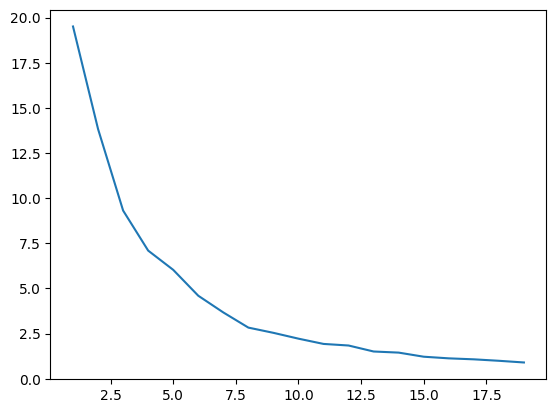

In [63]:
# SUM OF SQAURED ERROR
sse =[]
for k in range(1,20):
    km = KMeans(n_clusters=k)
    km.fit(df_check[['X','Y']])
    sse.append(km.inertia_)

ax =sns.lineplot(x=[*range(1,20)], y=sse)
plt.show()

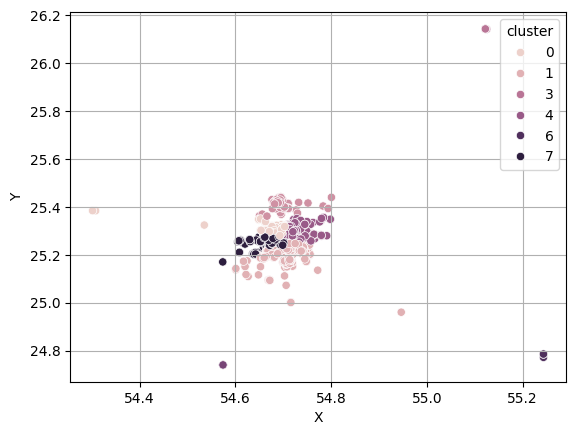

In [43]:
kmeans = KMeans(n_clusters=8)

predicted_labels = kmeans.fit_predict(df_check[['X','Y']])
df_check['cluster'] = predicted_labels

ax = sns.scatterplot(data=df_check, x='X', y='Y', hue='cluster')

ax.grid(True)

plt.show()

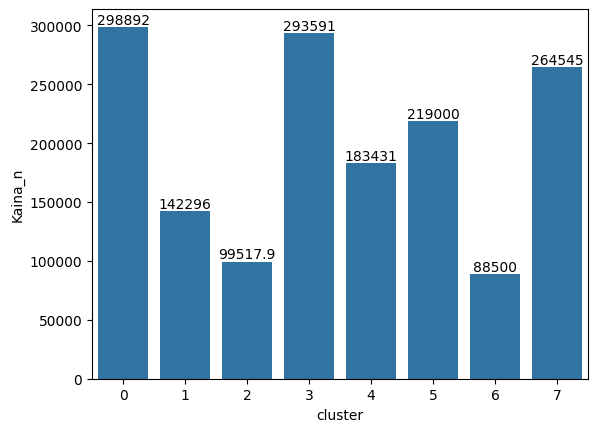

In [55]:
df_for_plot = df_check.groupby('cluster').mean().reset_index()
fig, ax = plt.subplots()
ax = sns.barplot(data=df_for_plot, x='cluster', y='Kaina_n')
for container in ax.containers:
    ax.bar_label(container) 
plt.show()

In [82]:
import plotly.express as px
fig = px.scatter_mapbox(data_frame=df_check, lon='Y', lat='X', zoom=10, color='cluster')
fig.update_layout(mapbox_style='open-street-map')
fig.update_traces(hovertemplate='X=%{lat}<br>Y=%{lon}<br>cluster=%{marker.color}<br>Kaina_n=%{customdata[0]}', customdata=df_check[['Kaina_n']])
fig.update_layout(width=800, height=600)
fig.show()

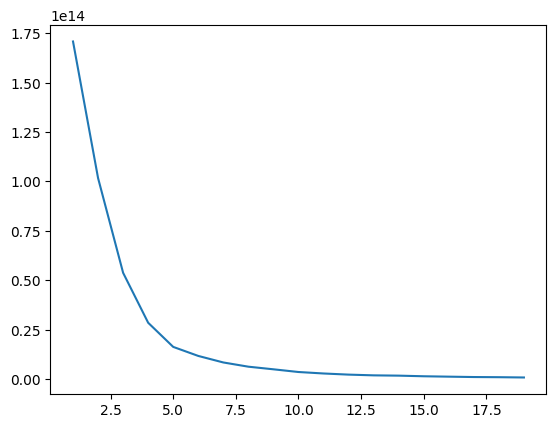

In [93]:
# SUM OF SQAURED ERROR
sse =[]
for k in range(1,20):
    km = KMeans(n_clusters=k)
    km.fit(df_check[['X','Y', 'Kaina_n']])
    sse.append(km.inertia_)

ax =sns.lineplot(x=[*range(1,20)], y=sse)
plt.show()

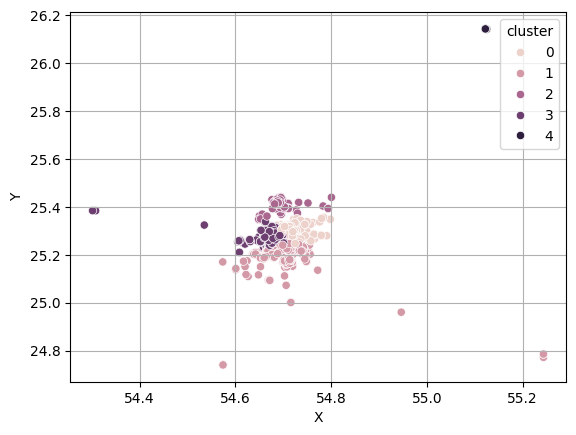

In [94]:
kmeans = KMeans(n_clusters=5)

predicted_labels = kmeans.fit_predict(df_check[['X','Y']])
df_check['cluster'] = predicted_labels

ax = sns.scatterplot(data=df_check, x='X', y='Y', hue='cluster')

ax.grid(True)

plt.show()

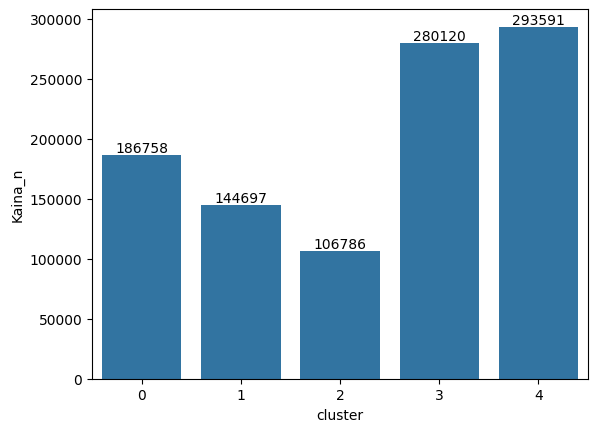

In [97]:
df_for_plot = df_check.groupby('cluster').mean().reset_index()
fig, ax = plt.subplots()
ax = sns.barplot(data=df_for_plot, x='cluster', y='Kaina_n')
for container in ax.containers:
    ax.bar_label(container) 
plt.show()

In [104]:
import plotly.express as px
fig = px.scatter_mapbox(data_frame=df_check, lon='Y', lat='X', zoom=11, color='cluster', size='Kaina_n')
fig.update_layout(mapbox_style='open-street-map')
fig.update_traces(hovertemplate='X=%{lat}<br>Y=%{lon}<br>cluster=%{marker.color}<br>Kaina_n=%{customdata[0]}', customdata=df_check[['Kaina_n']])
fig.update_layout(width=800, height=600)
fig.show()

In [ ]:
# GirdSearchCV

In [105]:
from sklearn.model_selection import GridSearchCV # su gridsearchcv tuninsime parametrus
# Define the parameter grid
param_grid = {
'n_clusters': range(2, 6 + 1),
'init': ['k-means++', 'random'],
'n_init': [5, 10, 15],
'max_iter': [100, 200, 300, 400, 500],
'tol': [0.0001, 0.001, 0.01],
'algorithm': ['auto', 'full', 'elkan'],
'random_state': [0, 42, 100]
}

# Create the KMeans object
kmeans = KMeans(random_state=42)

# Perform grid search
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X) # fitinam X, kurį susigeneravom darbo pradžioje

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print('Optimal number of clusters based on parameter grid: ' + str(grid_search.best_params_['n_clusters']))

Best hyperparameters:  {'algorithm': 'elkan', 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 6, 'n_init': 15, 'random_state': 42, 'tol': 0.001}
Optimal number of clusters based on parameter grid: 6


In [106]:
from sklearn.model_selection import GridSearchCV # su gridsearchcv tuninsime parametrus
# Define the parameter grid
param_grid = {
'n_clusters': range(2, 10 + 1),
'init': ['k-means++', 'random'],
'n_init': [5, 10, 15],
'max_iter': [100, 200, 300, 400, 500],
'tol': [0.0001, 0.001, 0.01],
'algorithm': ['auto', 'full', 'elkan', 'lloyd'],
'random_state': [0, 42, 100]
}

# Create the KMeans object
kmeans = KMeans(random_state=42)

# Perform grid search
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X) # fitinam X, kurį susigeneravom darbo pradžioje

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print('Optimal number of clusters based on parameter grid: ' + str(grid_search.best_params_['n_clusters']))

Best hyperparameters:  {'algorithm': 'elkan', 'init': 'random', 'max_iter': 100, 'n_clusters': 10, 'n_init': 10, 'random_state': 0, 'tol': 0.0001}
Optimal number of clusters based on parameter grid: 10


In [117]:
from sklearn.model_selection import GridSearchCV # su gridsearchcv tuninsime parametrus
# Define the parameter grid
param_grid = {
'n_clusters': range(2, 10 + 1)
}

# Create the KMeans object
kmeans = KMeans(random_state=42)

# Perform grid search
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X) # fitinam X, kurį susigeneravom darbo pradžioje

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print('Optimal number of clusters based on parameter grid: ' + str(grid_search.best_params_['n_clusters']))

Best hyperparameters:  {'n_clusters': 10}
Optimal number of clusters based on parameter grid: 10


In [ ]:
# aruodo - pridėti kainą už 1 kv. m, pritaikyti ir elbow metodą, ir gridsearch'ą
# du grafikai - su klasterių kiekiu iš elbow metodo
# grafikas - su klasterių kiekiu, nurodant parametrus iš gridsearchcv

In [130]:
aruodas = query_to_dataframe('C:/Users/manta/OneDrive/Dokumentai/Python projektai/web_scrap.db', 'SELECT * FROM aruodas')
aruodas_df = aruodas[aruodas['Tipas'] == 'Butai pardavimui']
aruodas_df['Miestas_n'] = aruodas_df['Miestas'].apply(lambda x: x.split(',')[0])
aruodas_df['X'] = aruodas_df['Coord'].apply(lambda x: float(x.replace('(','').replace(')','').split(',')[0]) if x!='None' else np.nan)
aruodas_df['Y'] = aruodas_df['Coord'].apply(lambda x: float(x.replace('(','').replace(')','').split(',')[1]) if x!='None' else np.nan)
aruodas_df['Kaina_n'] = aruodas_df['Kaina'].apply(lambda x: float(x) if x != None else x)
aruodas_df['Plotas_n'] = aruodas_df['Plotas'].apply(lambda x: x.replace(',','.').split()[0] if x!=None else x)
aruodas_df['Plotas_n'] = aruodas_df['Plotas_n'].apply(lambda x: float(x) if x != None else x)
aruodas_df = aruodas_df.dropna(subset=['Plotas_n', 'Kaina_n'])
aruodas_df['Kaina_kv'] = aruodas_df['Kaina_n'] / aruodas_df['Plotas_n']
aruodas_df_vilnius = aruodas_df[aruodas_df['Miestas_n'] == 'Vilnius']
df_check = aruodas_df_vilnius[['X','Y','Kaina_kv']].dropna()

In [129]:
aruodas_df

,id,Miestas,Kaina,Adresas,Namo numeris,Buto numeris,Plotas,Kambarių sk.,Aukštas,Aukštų sk.,...,Objektas,Kaina mėn.,Bendros erdvės pastate,Coord,Miestas_n,X,Y,Kaina_n,Plotas_n,Kaina_kv
0,1,"Vilnius, ŽirmūnaiRiterių g.",165000,"Vilnius, Žirmūnai, Riterių g., 2 kambarių butas",10,127,"40,52 m²",2,5,8,...,None,None,None,"(54.71684325, 25.291961476410883)",Vilnius,54.716843,25.291961,165000.0,40.52,4072.063179
1,2,"Palanga, PalangaA. Mickevičiaus g.",268000,"Palanga, Palanga, A. Mickevičiaus g., 2 kambar...",None,None,35 m²,2,1,3,...,None,None,None,"(55.9171652, 21.0597236)",Palanga,55.917165,21.059724,268000.0,35.00,7657.142857
2,3,"Vilnius, PašilaičiaiPerkūnkiemio g.",163000,"Vilnius, Pašilaičiai, Perkūnkiemio g., 3 kamba...",53,None,67 m²,3,8,12,...,None,None,None,"(54.737668150000005, 25.213011185027476)",Vilnius,54.737668,25.213011,163000.0,67.00,2432.835821
3,4,"Palanga, PalangaMedvalakio g.",62800,"Palanga, Palanga, Medvalakio g., 2 kambarių butas",27,None,"26,2 m²",2,1,2,...,None,None,None,"(55.925825599999996, 21.090597860419805)",Palanga,55.925826,21.090598,62800.0,26.20,2396.946565
4,5,"Palanga, PalangaMedvalakio g.",27700,"Palanga, Palanga, Medvalakio g., 1 kambario butas",27,None,14 m²,1,2,2,...,None,None,None,"(55.925825599999996, 21.090597860419805)",Palanga,55.925826,21.090598,27700.0,14.00,1978.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12816,12817,"Vilnius, ŽvėrynasSėlių g.",218000,"Vilnius, Žvėrynas, Sėlių g., 2 kambarių butas",72,None,"53,13 m²",2,2,4,...,None,None,None,"(54.6987486, 25.240454457273096)",Vilnius,54.698749,25.240454,218000.0,53.13,4103.143234
12817,12818,"Klaipėda, SenamiestisKurpių g.",130000,"Klaipėda, Senamiestis, Kurpių g., 2 kambarių b...",None,None,55 m²,2,4,4,...,None,None,None,"(55.70836, 21.1318664)",Klaipėda,55.708360,21.131866,130000.0,55.00,2363.636364
12818,12819,PalangaVytauto g.,199999,"Palanga, Vytauto g., 6 kambarių butas",None,None,135 m²,6,3,3,...,None,None,None,"(55.9229818, 21.0682657)",PalangaVytauto g.,55.922982,21.068266,199999.0,135.00,1481.474074
12819,12820,PalangaVytauto g.,300000,"Palanga, Vytauto g., 4 kambarių butas",None,None,143 m²,4,2,3,...,None,None,None,"(55.9229818, 21.0682657)",PalangaVytauto g.,55.922982,21.068266,300000.0,143.00,2097.902098


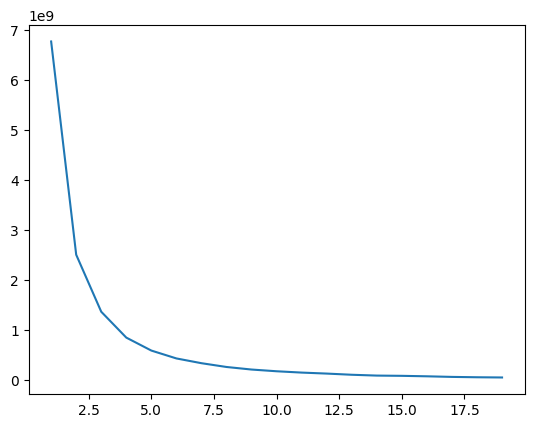

In [131]:
# SUM OF SQAURED ERROR
sse =[]
for k in range(1,20):
    km = KMeans(n_clusters=k)
    km.fit(df_check[['X','Y', 'Kaina_kv']])
    sse.append(km.inertia_)

ax =sns.lineplot(x=[*range(1,20)], y=sse)
plt.show()

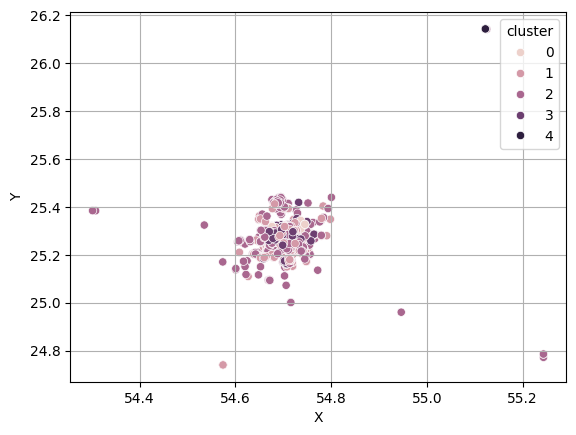

In [132]:
kmeans = KMeans(n_clusters=5)

predicted_labels = kmeans.fit_predict(df_check[['X','Y', 'Kaina_kv']])
df_check['cluster'] = predicted_labels

ax = sns.scatterplot(data=df_check, x='X', y='Y', hue='cluster')

ax.grid(True)

plt.show()

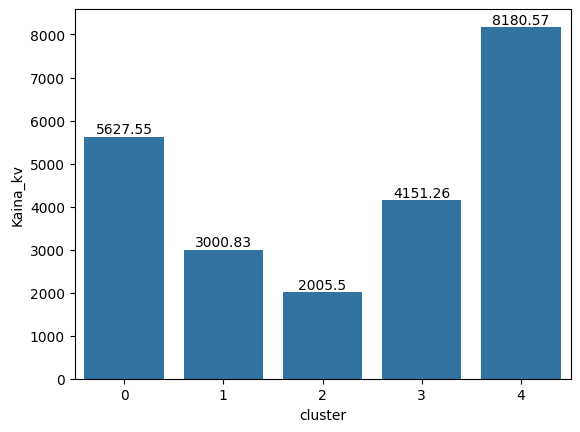

In [133]:
df_for_plot = df_check.groupby('cluster').mean().reset_index()
fig, ax = plt.subplots()
ax = sns.barplot(data=df_for_plot, x='cluster', y='Kaina_kv')
for container in ax.containers:
    ax.bar_label(container) 
plt.show()

In [135]:
import plotly.express as px
fig = px.scatter_mapbox(data_frame=df_check, lon='Y', lat='X', zoom=11, color='cluster')
fig.update_layout(mapbox_style='open-street-map')
fig.update_traces(hovertemplate='X=%{lat}<br>Y=%{lon}<br>cluster=%{marker.color}<br>Kaina_kv=%{customdata[0]}', customdata=df_check[['Kaina_kv']])
fig.update_layout(width=800, height=600)
fig.show()

In [ ]:
df_check = aruodas_df_vilnius[['X','Y','Kaina_kv']].dropna()


In [141]:
from sklearn.model_selection import GridSearchCV # su gridsearchcv tuninsime parametrus
# Define the parameter grid
param_grid = {
'n_clusters': range(2, 10 + 1),
'init': ['k-means++', 'random'],
'n_init': [5, 10, 15],
'max_iter': [100, 200, 300, 400, 500],
'tol': [0.0001, 0.001, 0.01],
'algorithm': ['auto', 'full', 'elkan', 'lloyd'],
'random_state': [0, 42, 100, None]
}

# Create the KMeans object
kmeans = KMeans()

# Perform grid search
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(df_check) # fitinam X, kurį susigeneravom darbo pradžioje

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print('Optimal number of clusters based on parameter grid: ' + str(grid_search.best_params_['n_clusters']))

Best hyperparameters:  {'algorithm': 'elkan', 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 10, 'n_init': 15, 'random_state': 0, 'tol': 0.01}
Optimal number of clusters based on parameter grid: 10


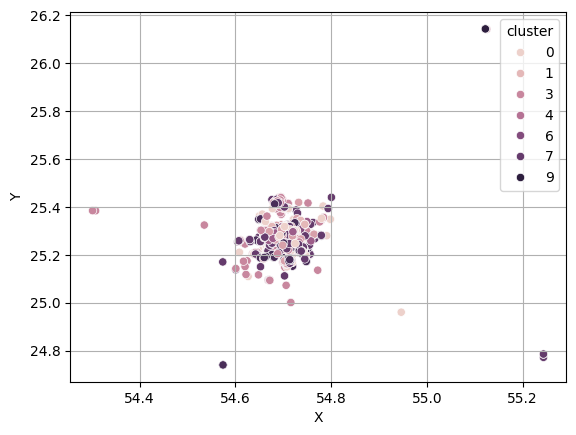

In [142]:
kmeans = KMeans(algorithm='elkan', init='k-means++', max_iter=100, n_clusters=10, n_init=15, random_state=0, tol=0.01)

predicted_labels = kmeans.fit_predict(df_check[['X','Y', 'Kaina_kv']])
df_check['cluster'] = predicted_labels

ax = sns.scatterplot(data=df_check, x='X', y='Y', hue='cluster')

ax.grid(True)

plt.show()

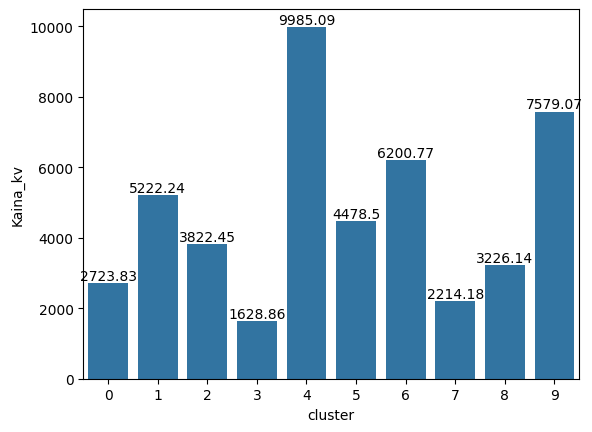

In [143]:
df_for_plot = df_check.groupby('cluster').mean().reset_index()
fig, ax = plt.subplots()
ax = sns.barplot(data=df_for_plot, x='cluster', y='Kaina_kv')
for container in ax.containers:
    ax.bar_label(container) 
plt.show()

In [144]:
import plotly.express as px
fig = px.scatter_mapbox(data_frame=df_check, lon='Y', lat='X', zoom=11, color='cluster')
fig.update_layout(mapbox_style='open-street-map')
fig.update_traces(hovertemplate='X=%{lat}<br>Y=%{lon}<br>cluster=%{marker.color}<br>Kaina_kv=%{customdata[0]}', customdata=df_check[['Kaina_kv']])
fig.update_layout(width=800, height=600)
fig.show()